In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# загрузим данным
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# как видим из сводки, в данных нет пропусков. Все признаки имеют числовой тип.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# анализ статистик указывает на то, что в данных могут быть выбросы
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [61]:
# функция для построения ящика с усами для выявления выбросов в признаках
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(X[i])
        plt.show()
    pass


In [65]:
# отключим предупреждения
import warnings
warnings.filterwarnings("ignore")

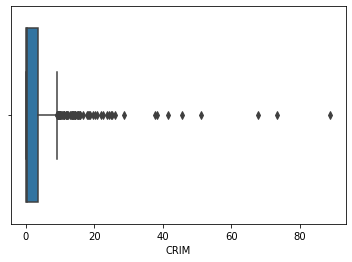

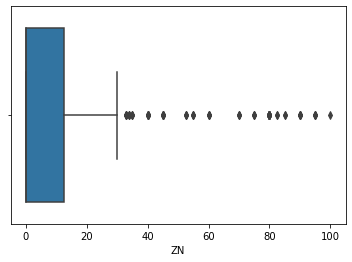

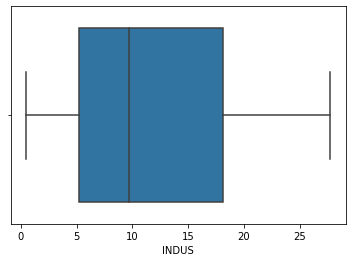

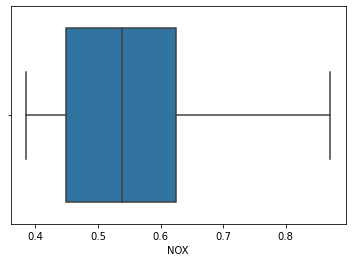

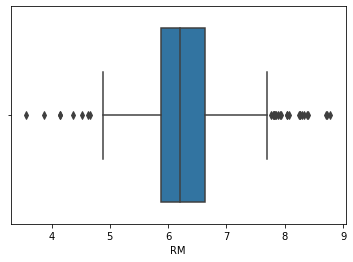

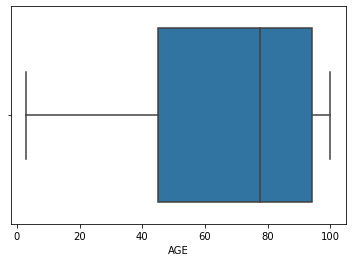

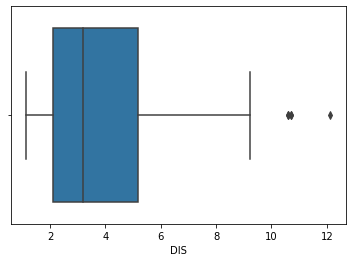

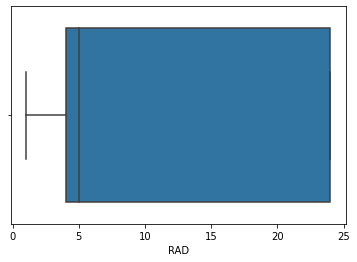

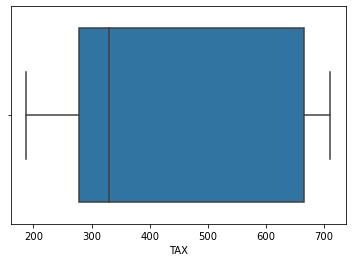

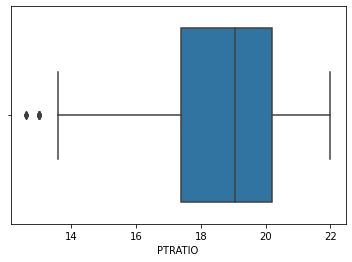

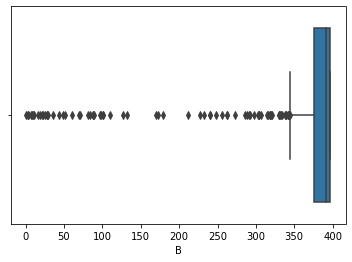

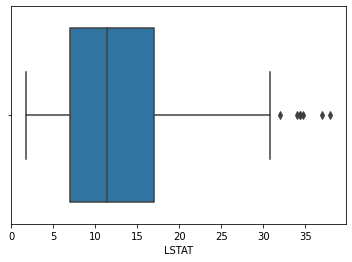

In [67]:
# выбросы есть в признаках CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT. C ними можно бороться разными способами: удалить, 
# сделать индикаторную переменную или интервальную. Будем пробовать разные методы в зависимости от того, насколько переменная значимая
columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
get_boxplot(data, columns)

In [84]:
# здесь будем указывать признаки, которые будем использовать в модели
col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = ['MEDV']

In [83]:
# функция для оценки качества модели
def get_score(X,y, random_seed=42, model=LinearRegression()):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    model.fit(X_train, y_train)
    return ('score model_0 = {:.4f}'.format(model.score(X_test, y_test)))

In [81]:
# посмотрим, какое качество модель имеет изначально
get_score(data[col], data[target])

'score model_0 = 0.7112'

In [87]:
def get_score(X,y, random_seed=42, model=LinearRegression()):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    model.fit(X_train, y_train)
    return ('score model_1 = {:.4f}'.format(model.score(X_test, y_test)))

In [85]:
# удалим выбросы в признаке LSTAT, посмотрим как это повлияет на score
data = data[data['LSTAT'] <= 30]

In [88]:
# удаление выбросов в признаке LSTAT подняло score
get_score(data[col], data[target])

'score model_1 = 0.7714'

In [89]:
# переменная CRIM оказывает существенное влияние на score и при этом имеет достаточно большое кол-во выбросов, которые нельзя 
# удалить, так как это снизит score. Создадим для нее индикаторную переменную, которая будет принимать 1, если значение CRIM > 10
data['ind_CRIM'] = 0
data.loc[data[data['CRIM'] > 10].index, 'ind_CRIM'] = 1

In [93]:
# проверим
data.loc[data[data['CRIM'] > 10].index, 'ind_CRIM'][:3]

367    1
375    1
376    1
Name: ind_CRIM, dtype: int64

In [94]:
# индикатор есть
data.loc[367]

CRIM         13.5222
ZN            0.0000
INDUS        18.1000
CHAS          0.0000
NOX           0.6310
RM            3.8630
AGE         100.0000
DIS           1.5106
RAD          24.0000
TAX         666.0000
PTRATIO      20.2000
B           131.4200
LSTAT        13.3300
MEDV         23.1000
ind_CRIM      1.0000
Name: 367, dtype: float64

In [95]:
# score поднялся только на 0.002
col = ['CRIM', 'ind_CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
get_score(data[col], data[target])

'score model_1 = 0.7716'

In [96]:
# интересно, что если удалить переменную CRIM и оставить только ее индикатор, то score поднимется почти на 1% 
col = ['ind_CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
get_score(data[col], data[target])

'score model_1 = 0.7810'

In [97]:
# переменная RM оказывает существенное влияние на модель и имеет выбросы как в нижнюю сторону, так и вверх. 
# выбросы вниз единичны, попробуем их удалить, а для выбросов вверх сделаем индикатор.
data = data[data['RM'] >=5]

In [98]:
# существенный прирост в score
get_score(data[col], data[target])

'score model_1 = 0.8209'

In [99]:
# индикатор для выбросов вверх
data['RM_ind'] = 0
data.loc[data[data['RM'] >= 7].index, 'RM_ind'] = 1

In [100]:
# незначительный, но прирост в score есть
col = ['ind_CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RM_ind', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
get_score(data[col], data[target])

'score model_1 = 0.8293'

In [101]:
# для переменной RAD сделаем one hot encoding , так как она порядковая, это может поднять качество модели
data_dum = pd.get_dummies(data['RAD'])
data_dum.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 24], dtype='int64')

In [103]:
for i in data_dum.columns:
    data['RAD'+str(i)] = data_dum[i]

In [104]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RM_ind,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,0,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,1,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,0,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,1,0,0,1,0,0,0,0,0,0


In [105]:
# score подняли!
col = ['ind_CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RM_ind', 'AGE', 'DIS', 'RAD1', 'RAD2', 'RAD3', \
       'RAD4', 'RAD5', 'RAD6', 'RAD7', 'RAD8', 'RAD24','TAX', 'PTRATIO', 'B', 'LSTAT']
get_score(data[col], data[target])

'score model_1 = 0.8360'

In [117]:
# для переменной AGE можно попробовать создать интервальную переменную, а потом по ней сделать one hot encoding
def interval(x):
    if x < 60:
        y = 'AGE<60'
    elif x >= 60 and x < 80:
        y = 'AGE60-80'
    elif x >= 80 and x < 100:
        y = 'AGE80-100'
    else:
        y = 'AGE>=100'
    return y

In [118]:
data['inter_AGE'] = data['AGE'].apply(interval)

In [119]:
data_age = pd.get_dummies(data['inter_AGE'])
data_age.columns

Index(['AGE60-80', 'AGE80-100', 'AGE<60', 'AGE>=100'], dtype='object')

In [120]:
for i in data_age.columns:
    data[i] = data_age[i]

In [121]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RAD8,RAD24,inter_AGE,AGE20-40,AGE40-60,AGE60-80,AGE80-100,AGE<20,AGE>=100,AGE<60
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,0,0,AGE60-80,0,0,1,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,0,0,AGE60-80,0,0,1,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,0,0,AGE60-80,0,0,1,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,0,0,AGE<60,0,1,0,0,0,0,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,0,0,AGE<60,0,1,0,0,0,0,1


In [123]:
# тоже немного увеличили score 
col = ['ind_CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RM_ind', 'DIS', 'RAD1', 'RAD2', 'RAD3', \
       'RAD4', 'RAD5', 'RAD6', 'RAD7', 'RAD8', 'RAD24','TAX', 'PTRATIO', 'B', 'LSTAT', \
       'AGE<60', 'AGE60-80', 'AGE80-100', 'AGE>=100']
get_score(data[col], data[target])

'score model_1 = 0.8371'

In [126]:
# общий прирост score получился: 
gain = 0.8371 - 0.7112
print('Общий прирост составил: {0:.0%}'.format(gain))

Общий прирост составил: 13%
